# Pendulum example

The humble pendulum must be one of the most used examples of a dynamic system. A pendulum consists
of a suspended weight that can freely swing around a pivot point. Gravity results in acceleration
towards the resting position located below the pivot point. The velocity of the weight pulls it
past the resting position, resulting in a decelerating force due to gravity. This results in an
oscillatory movement, swinging past the resting position. A dampened pendulum will lose amplitude
and eventually come at a rest in the resting position, while a frictionless pendulum will keep
swinging in a periodic fashion.

![A simple gravity pendulum without
friction.](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Simple_gravity_pendulum.svg/255px-Simple_gravity_pendulum.svg.png)

Source: [Wikipedia: Pendulum](https://en.wikipedia.org/wiki/Pendulum)

Mathematically, the movement of the pendulum can be described as

$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l} * \sin\theta
$$

with

- $\theta$: the angle of the pendulum relative to equilibrium position,
- $\frac{d^2\theta}{dt^2}$: the angular acceleration, or the change in angular velocity,
- $g$: the gravitational constant,
- $l$: the length of the pendulum.

This function implements the mathematical model. The function receives the current `state` as
argument, and returns how those states should update based on the `state`, `inputs` and
`parameters`. The model has two states: the angle $\theta$ and it's derivative. The function
returns the first and second derivatives of $\theta$. 

In [1]:
import numpy as np


def pendulum(time, state, inputs, parameters):
    g = parameters["g"]
    l = parameters["l"]
    theta = state["theta"]

    first_derivative_theta = state["dtheta"]
    second_derivative_theta = -(g / l) * np.sin(theta)

    return {"dtheta": first_derivative_theta, "ddtheta": second_derivative_theta}


This defines the model using the function defined above. The labels of the state are supplied, as
well as the parameters. This model has no inputs. 

In [2]:
from physiomodeler import PhysioModel

model = PhysioModel(
    function=pendulum,
    state=("theta", "dtheta"),
    parameters={"g": 9.81, "l": 1},
)


The model is simulated for 10 seconds, with an initial angle $\theta$ of 0.1 and no initial angular
velocity. The result is a pandas DataFrame with the time as index, the states and all outputs of
the function as columns. 

,theta,dtheta,ddtheta
time,,,
0.000000,0.100000,0.000000,-0.979366
0.001011,0.099999,-0.000990,-0.979361
0.011121,0.099939,-0.010889,-0.978775
0.112216,0.093897,-0.107663,-0.919772
0.299677,0.059146,-0.252408,-0.579880


<Axes: xlabel='time'>

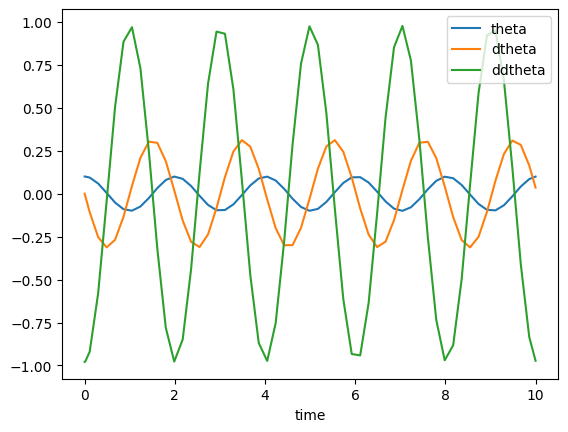

In [3]:
df = model.input_output_response(time=10, initial_state=(0.1, 0))
display(df.head())
df.plot()

We did not define the time step the model should use. Therefore, SciPy's `solve_ivp` automatically
chose the resulting time steps. Smaller timesteps will render in smoother results. 

<Axes: xlabel='time'>

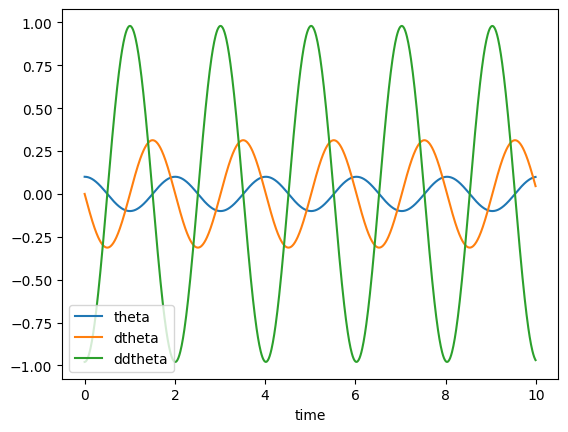

In [4]:
df = model.input_output_response(time=10, dt=0.01, initial_state=(0.1, 0))
df.plot()